# Unit 12 - Tales from the Crypto

---


# Vadar Sentiment activity 

## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [25]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/danshe/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [26]:
# Read your api key environment variable

api_key = "e854703a35534970b8ab693526cd95f9"

In [39]:
# Create a newsapi client

newsapi = NewsApiClient(api_key=api_key)

In [40]:
print(api_key)

e854703a35534970b8ab693526cd95f9


In [41]:
btc_headlines= newsapi.get_everything("Bitcoin"
)

In [42]:
# Fetch the Bitcoin news articles

btc_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en"
)
# # Print total articles
print(f"Total articles about Bitcoin: {btc_headlines['totalResults']}")

# # Show sample article
btc_headlines["articles"][0]

Total articles about Bitcoin: 8470


{'source': {'id': 'cnn', 'name': 'CNN'},
 'author': None,
 'title': 'Is Bitcoin a safe bet?',
 'description': 'The digital cryptocurrency Bitcoin has tripled in value in the past three years. Will the boom only lead to a bigger bust?',
 'url': 'https://www.cnn.com/videos/business/2021/02/20/is-bitcoin-a-safe-bet-smerconish-vpx.cnn',
 'urlToImage': 'https://cdn.cnn.com/cnnnext/dam/assets/210220112649-smerconish-bitcoin-guests-split-super-tease.jpg',
 'publishedAt': '2021-02-20T17:12:04Z',
 'content': None}

In [47]:
# Fetch the Ethereum news articles

eth_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {eth_headlines['totalResults']}")

# Show sample article
eth_headlines["articles"][0]

Total articles about Ethereum: 1974


{'source': {'id': 'engadget', 'name': 'Engadget'},
 'author': 'Jon Fingas',
 'title': 'NVIDIA limits RTX 3060 crypto speeds as it introduces mining cards',
 'description': "Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. The company has revealed that it's cutting the hash rate (mi…",
 'url': 'https://www.engadget.com/nvidia-limits-rtx-3060-for-crypto-mining-161657361.html',
 'urlToImage': 'https://s.yimg.com/uu/api/res/1.2/VLoRobjl1FcFEgV_0XjzqQ--~B/aD0xMDY3O3c9MTYwMDthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2021-02/cad5ae60-7200-11eb-bbbc-25bd3507e406.cf.jpg',
 'publishedAt': '2021-02-18T16:16:57Z',
 'content': 'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [

In [85]:
# Create the Bitcoin sentiment scores DataFrame


btc_sentiments = []

for article in btc_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        title= article["title"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "Text": text,
            "Date": date,
            "BTC Title":title,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["Date", "BTC Title", "Text", "Compound", "Positive", "Negative", "Neutral"]
btc_df = btc_df[cols]

btc_df.head()



,Date,BTC Title,Text,Compound,Positive,Negative,Neutral
0,2021-02-26,Coinbase says unmasking Satoshi Nakamoto might...,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887
1,2021-03-03,Why bitcoin could triple over next year,,0.0000,0.000,0.000,0.000
2,2021-02-16,"Bitcoin Hit All-Time High at Over $50,000, Lea...","Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.000,0.860
3,2021-02-12,Daily Crunch: Jack Dorsey and Jay Z invest in ...,Jack Dorsey and Jay Z create a bitcoin endowme...,-0.1280,0.066,0.082,0.852
4,2021-02-13,Bitcoin Burning a Hole in Your Pocket? Now You...,"In case you havent noticed, Bitcoins having a ...",0.4215,0.101,0.000,0.899


In [82]:
# Create the Ethereum sentiment scores DataFrame

eth_sentiments = []

for article in eth_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        title= article["title"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "Text": text,
            "ETH Title": title,
            'Date': date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["Date", "ETH Title", "Text", "Compound", "Positive", "Negative", "Neutral"]
eth_df = eth_df[cols]

eth_df.head()



,Date,ETH Title,Text,Compound,Positive,Negative,Neutral
0,2021-02-18,NVIDIA limits RTX 3060 crypto speeds as it int...,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818
1,2021-03-06,What are NFTs? Everything you need to know.,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789
2,2021-02-27,"If you haven’t followed NFTs, here’s why you s...",NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909
3,2021-02-20,Remastered 'nyan cat' art sells for the equiva...,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970
4,2021-02-18,Nvidia Is Making Graphics Cards Just for Crypt...,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.000,0.856


In [57]:
# Describe the Bitcoin Sentiment

btc_df.describe()

,compound,positive,negative,neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.258483,0.068500,0.008444,0.867500
std,0.341162,0.070864,0.024663,0.227035
min,-0.361200,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.856250
50%,0.221350,0.068000,0.000000,0.917500
75%,0.559650,0.110000,0.000000,0.989500
max,0.831600,0.246000,0.082000,1.000000


In [56]:
# Describe the Ethereum Sentiment

eth_df.describe()

,compound,positive,negative,neutral
count,91.000000,91.000000,91.000000,91.000000
mean,0.174930,0.067308,0.029275,0.903407
std,0.393103,0.065594,0.057105,0.081561
min,-0.910000,0.000000,0.000000,0.664000
25%,0.000000,0.000000,0.000000,0.854000
50%,0.140600,0.063000,0.000000,0.909000
75%,0.492750,0.099000,0.054000,0.985000
max,0.877900,0.251000,0.299000,1.000000


# Range for Positive, Negative, and Neutral is between 0 and 1

# For compound, the range is between -1 and 1
1. positive >=0.05
2. Neutral > -0.05 and <0.05 
3. Negative <= =0.05



### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin and Ethereum mean positive scores are similar, Bitcoin is marginally higher.

Q: Which coin had the highest compound score?

A: Ethereum had a highest maximum compound score. 

Q. Which coin had the highest positive score?

A: Ethereum had the highest maximum positive score. 

---

# 1- Stopwords 

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [91]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [125]:
def tokenizer(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_cleafn)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [228]:
# Create a new tokens column for Bitcoin

btc_tokens= btc_df.copy()

tokenized= []
for i in btc_tokens['Text']:
    tokenized_articles= tokenizer(i)
    tokenized.append({"tokens": tokenized_articles})
    
tokens_df=pd.DataFrame(tokenized)
btc_tokens['Token Text'] = tokens_df

tokens_df= pd.DataFrame(tokenized)
btc_tokens['Token Title'] = tokens_df

In [199]:
tokenized = []
for i in btc_tokens['BTC Title']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens title':tokenized_articles})

In [200]:
btc_tokens.head()

,Date,BTC Title,Text,Compound,Positive,Negative,Neutral,Token Text,Token Title
0,2021-02-26,Coinbase says unmasking Satoshi Nakamoto might...,Some things are best left a mystery at least a...,0.6369,0.113,0.000,0.887,"[thing, best, left, mystery, least, far, coinb...","[thing, best, left, mystery, least, far, coinb..."
1,2021-03-03,Why bitcoin could triple over next year,,0.0000,0.000,0.000,0.000,[],[]
2,2021-02-16,"Bitcoin Hit All-Time High at Over $50,000, Lea...","Bitcoin is the future, again: this morning, it...",0.7041,0.140,0.000,0.860,"[bitcoin, future, morning, hit, alltime, high,...","[bitcoin, future, morning, hit, alltime, high,..."
3,2021-02-12,Daily Crunch: Jack Dorsey and Jay Z invest in ...,Jack Dorsey and Jay Z create a bitcoin endowme...,-0.1280,0.066,0.082,0.852,"[jack, dorsey, jay, z, create, bitcoin, endowm...","[jack, dorsey, jay, z, create, bitcoin, endowm..."
4,2021-02-13,Bitcoin Burning a Hole in Your Pocket? Now You...,"In case you havent noticed, Bitcoins having a ...",0.4215,0.101,0.000,0.899,"[case, havent, noticed, bitcoins, bit, moment,...","[case, havent, noticed, bitcoins, bit, moment,..."


In [201]:
# Create a new tokens column for Ethereum


eth_tokens= eth_df.copy()

tokenized= []
for i in eth_tokens['Text']:
    tokenized_articles= tokenizer(i)
    tokenized.append({"tokens": tokenized_articles})
    
tokens_df=pd.DataFrame(tokenized)
# tokens_df= btc_tokens['Text'] 
eth_tokens['Token Text'] = tokens_df    

In [202]:
tokenized = []
for i in eth_tokens['ETH Title']:
    tokenized_articles = tokenizer(i)
    tokenized.append({'tokens title':tokenized_articles})
    
tokens_df= pd.DataFrame(tokenized)
eth_tokens['Token Title'] = tokens_df

In [203]:
eth_tokens.head()

,Date,ETH Title,Text,Compound,Positive,Negative,Neutral,Token Text,Token Title
0,2021-02-18,NVIDIA limits RTX 3060 crypto speeds as it int...,Worried that the GeForce RTX 3060 will be sold...,-0.3400,0.063,0.119,0.818,"[worried, geforce, rtx, sold, cryptocurrency, ...","[nvidia, limit, rtx, crypto, speed, introduces..."
1,2021-03-06,What are NFTs? Everything you need to know.,NFTs are the latest cryptocurrency rage these ...,-0.4588,0.066,0.145,0.789,"[nfts, latest, cryptocurrency, rage, day, band...","[nfts, everything, need, know]"
2,2021-02-27,"If you haven’t followed NFTs, here’s why you s...",NFTs (non-fungible tokens) — or scarce digital...,0.4404,0.091,0.000,0.909,"[nfts, nonfungible, token, scarce, digital, co...","[havent, followed, nfts, start]"
3,2021-02-20,Remastered 'nyan cat' art sells for the equiva...,While the first Christie's auction of digital ...,0.0258,0.030,0.000,0.970,"[first, christies, auction, digital, artwork, ...","[remastered, nyan, cat, art, sell, equivalent, k]"
4,2021-02-18,Nvidia Is Making Graphics Cards Just for Crypt...,Attempting to get ahead of cryptocurrency mine...,0.7096,0.144,0.000,0.856,"[attempting, get, ahead, cryptocurrency, miner...","[nvidia, making, graphics, cards, cryptocurren..."


---

## Counter Excercise 

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [204]:
from collections import Counter
from nltk import ngrams

In [207]:
all_btc_words=[]
for text in btc_tokens['Token Text']:
    for word in text:
        all_btc_words.append(word)

In [208]:
all_eth_words = []
for text in eth_tokens['Token Text']:
    for word in text:
        all_eth_words.append(word)

In [220]:
btc_sent = []
for sent in btc_tokens['Text']:
    sent_list_btc = sent
    btc_sent.append(sent_list)

In [221]:
eth_sent = []
for sent in eth_tokens['Text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)

In [222]:
# Generate the Bitcoin N-grams where N=2

def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['Bigram', 'Count'])

In [223]:
# Generate the Ethereum N-grams where N=2

bigram_counter(btc_sent)

,Bigram,Count
0,"(poster, participatingbitcoins)",18
1,"(participatingbitcoins, price)",18
2,"(price, soared)",18
3,"(soared, past)",18
4,"(past, friday)",18
5,"(friday, pushing)",18
6,"(pushing, combined)",18
7,"(combined, value)",18
8,"(value, bitcoins)",18
9,"(bitcoins, past)",18


In [224]:
bigram_counter(eth_sent)

,Bigram,Count
0,"(char, reuters)",11
1,"(record, high)",8
2,"(reuters, stafffile)",6
3,"(stafffile, photo)",6
4,"(nonfungible, token)",5
5,"(reuters, bitcoin)",5
6,"(virtual, currency)",5
7,"(illustration, taken)",5
8,"(char, new)",4
9,"(new, york)",4


In [225]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    Counter_words = dict(Counter(tokens).most_common(N))
    return pd.DataFrame(list(Counter_words.items()), columns=['Word', 'Count'])

In [226]:
# Use token_count to get the top 10 words for Bitcoin

token_count(all_btc_words)

,Word,Count
0,char,17
1,bitcoin,9
2,ha,7
3,reuters,6
4,cryptocurrency,5
5,exchange,3
6,morning,3
7,high,3
8,value,3
9,investment,3


In [227]:
# Use token_count to get the top 10 words for Ethereum

token_count(all_eth_words)

,Word,Count
0,char,91
1,bitcoin,38
2,reuters,27
3,cryptocurrency,24
4,new,23
5,ha,21
6,ethereum,15
7,high,15
8,market,12
9,card,11


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [232]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [250]:
# Process text for wordcloud creation


def processed_text(corpus): 
    big_string = ' '.join(corpus)
    return big_string

In [246]:
bitcoin_words = processed_text(all_btc_words)
eth_words = processed_text(all_eth_words)

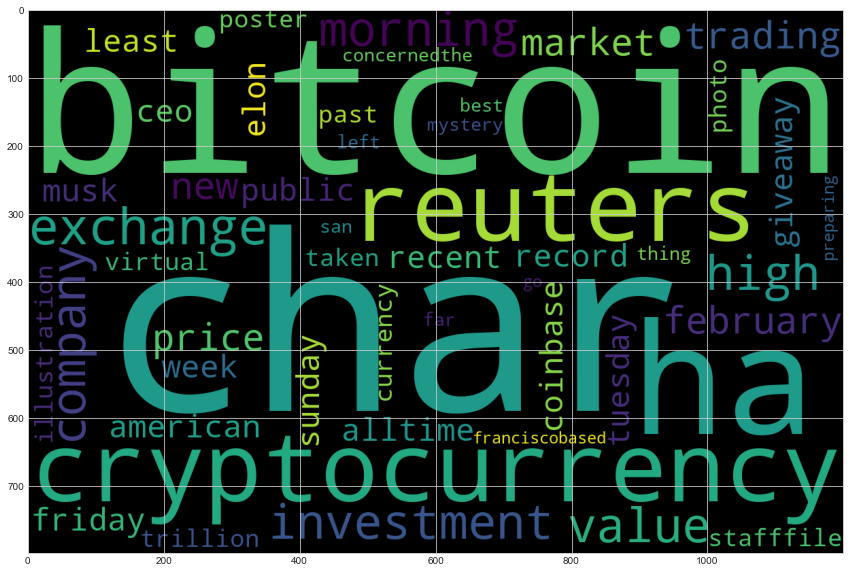

In [247]:
# Generate the Bitcoin word cloud


wc = WordCloud(width=1200, height=800, max_words=50,collocations=False).generate(bitcoin_words)
plt.imshow(wc)

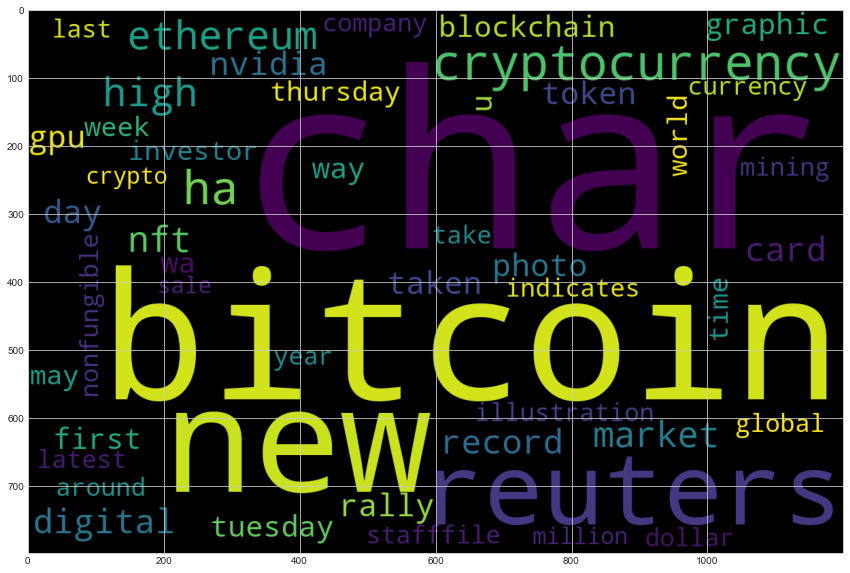

In [249]:
# Generate the Ethereum word cloud


wc = WordCloud(width=1200, height=800, max_words=50,collocations=False).generate(eth_words)
plt.imshow(wc)

## POS_tagging excercise 

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [251]:
import spacy
from spacy import displacy

In [252]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [253]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [261]:
# Concatenate all of the Bitcoin text together

bitcoin_sent = []
for sent in btc_tokens['Text']:
    sent_list = sent
    bitcoin_sent.append(sent_list)
    
big_string_bitcoin = ' '.join(bitcoin_sent)
big_string_bitcoin

'Some things are best left a mystery at least as far as Coinbase is concerned.\xa0\r\nThe San Francisco-based cryptocurrency exchange has been preparing to go public since last year, and in a Thursday pros… [+1953 chars]  Bitcoin is the future, again: this morning, it hit an all-time high value of over $50,000. Is there a lesson in here? Are Elon Musks tweets a good investment strategy? Should we get in on this? We ha… [+3198 chars] Jack Dorsey and Jay Z create a bitcoin endowment, Datadog acquires a Startup Battlefield company and BuzzFeed experiments with AI-generated quizzes. This is your Daily Crunch for February 12, 2021.\r\n… [+2805 chars] In case you havent noticed, Bitcoins having a bit of a moment. The cryptocurrencys value reached record heights in recent weeks, youll soon be able to buy a Tesla with it, and, as of Friday, you can … [+1500 chars] TL;DR: Enter the The Complete Bitcoin (BTC) Investment Giveaway for a chance to win over $12,000 in cryptocurrency-related prizes.\

In [262]:
# Run the NER processor on all of the text


bitcoin_doc = nlp(big_string_bitcoin)
bitcoin_doc.user_data['title'] = 'Bitcoin NER'
displacy.render(bitcoin_doc, style='ent')

# Add a title to the document


In [263]:
# Render the visualization

bitcoin_doc = nlp(big_string_bitcoin)
bitcoin_doc.user_data['title'] = 'Bitcoin NER'
displacy.render(bitcoin_doc, style='ent')

In [264]:
# List all Entities

for ent in bitcoin_doc.ents:
    print (ent, ent.label_)

Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
this morning TIME
over $50,000 MONEY
Jack Dorsey PERSON
Jay Z PERSON
Datadog ORG
Startup Battlefield ORG
BuzzFeed ORG
AI ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Bitcoins PERSON
recent weeks DATE
Friday DATE
over $12,000 MONEY
New York GPE
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
Blockchain.com ORG
$120 million MONEY
Moore Strategic Ventu PERSON
This morning TIME
Coinbase WORK_OF_ART
American NORP
19, 2021 DATE
Elon Musk PERSON
Binance GPE
Changp GPE
Reuters ORG
Dec. 8, 2017 DATE
Benoit Tessier/Illustration ORG
Reuters ORG
Reuters ORG
Bitcoin PERSON
January 21, 2021 DATE
Reuters ORG
Reuters ORG
Feb 21 DATE
Reuters ORG
Sunday DATE
two-month DATE
$1 trillion MONEY
Friday DATE
Reuters ORG
Pristina GPE
Kosovo GPE
June 12, 2018 DATE
HONG KONG GPE
Reuters Breakingviews ORG
Feb. 19, 2021 DATE
Evolve WORK_OF_ART
week of February DATE
North American NORP
7 CARDINAL
7 CARDINAL
one CARDINA

---

### Ethereum NER

In [267]:
# Concatenate all of the Ethereum text together

eth_sent = []
for sent in eth_tokens['Text']:
    sent_list_eth = sent
    eth_sent.append(sent_list_eth)
    
big_string_eth = " ".join(eth_sent)
big_string_eth

'Worried that the GeForce RTX 3060 will be sold out as cryptocurrency miners snap up every GPU in sight? NVIDIA thinks it has a simple way to help: make the new card unattractive to the crypto crowd. … [+1652 chars] NFTs are the latest cryptocurrency rage these days, with bands like Kings of Leon releasing their next album as limited edition "golden tickets," and NBA digital collectibles being sold for millions … [+7287 chars] NFTs (non-fungible tokens) — or scarce digital content represented as tokens — are driving a new wave of crypto adoption.\r\nThanks to the Ethereum blockchain, artists, gaming companies and content cre… [+5365 chars] While the first Christie\'s auction of digital artwork backed by NFT (non-fungible token) is still a few days away, one of the most notable sales in that world has already taken place. Chris Torres cr… [+1064 chars] Attempting to get ahead of cryptocurrency miners who might snatch up a good chunk of RTX 3060 stock when the GPU goes on sale next week,

In [269]:
# Run the NER processor on all of the text

eth_doc = nlp(big_string_eth)
eth_doc.user_data['title'] = 'Ethereum NER'
displacy.render(eth_doc, style='ent')

# Add a title to the document


In [270]:
# Render the visualization


In [271]:
# List all Entities
for ent in eth_doc.ents:
    print (ent, ent.label_)

GeForce ORG
3060 GPE
GPU ORG
these days DATE
Kings PERSON
NBA ORG
millions CARDINAL
Ethereum ORG
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
3060 DATE
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Coinbase NORP
San Francisco GPE
last year DATE
Thursday DATE
Bitfinex ORG
Bitfinex ORG
millions of dollars MONEY
Reuters ORG
SINGAPORE PERSON
Reuters ORG
Asian NORP
Saturday DATE
two-month DATE
$1 trillion MONEY
a day earlier DATE
World FX ORG
Kevin Buckland PERSON
Reuters ORG
Meitu ORG
Hong Kong GPE
China GPE
March 24, 2017 DATE
Bobby Yip PERSON
HONG KONG GPE
Reuters ORG
Hong Ko PERSON
Reuters ORG
SINGAPORE GPE
Feb 15 DATE
Reuters ORG
Asian NORP
Monday DATE
more than 5% PERCENT
more than a 

---